In [49]:
import os

import pandas as pd
import numpy as np

import tensorflow as tf

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score 

In [5]:
def csv_generator(path):
    """
    Reads excel file with raw data from stores, list of DataFrames
    with raw data to be transformed

    Args:
        path (_type_): string path to data file

    Yields:
        _type_: _description_
    """
    # os.chdir('./scripts')
    # Gets the columns names and amount of rows per store for chunk reading the raw data.
    raw_df = pd.read_excel('raw_data.xlsx', sheet_name='Hoja2')
    raw_df.drop(raw_df[raw_df['Area de Salida'] != 'Seco'].index, inplace = True)
    #Loop that creates a generator object and finally yields DF store by store.
    raw_df.replace("#N/D", np.NaN, regex=False, inplace=True)
    raw_df.dropna(inplace=True)
    raw_df['Dia sem'] = raw_df['Dia sem'].astype(str)
    # raw_df.reset_index()
    # raw_df.index.name = 'Index'
    # WRITE TO CSV
    # raw_df.to_csv('raw_data.csv')
    unique_suc_df = raw_df['BWTDA'].unique().astype(int)
    return raw_df, unique_suc_df

path_to_excel = './dia_analisis/scripts'
raw_df, suc_df = csv_generator(path_to_excel)

In [92]:
store = 9

store_df = raw_df[raw_df['BWTDA'] == store]


In [93]:
store_df = store_df[['Bultos', 'Dia sem', 'Contenedores']]
store_df.replace("#N/D", np.NaN, regex=False, inplace=True)
store_df.dropna(inplace=True)
store_df['Dia sem'] = store_df['Dia sem'].astype(str)
df_x = pd.get_dummies(store_df[['Bultos','Dia sem']], dtype=int)
df_y = store_df[['Contenedores']]

In [94]:
model_3 = tf.keras.models.load_model(f'./out_models/store_9_d2_r83')
# os.getcwd()
X = df_x.values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_poly = np.concatenate([X**n for n in range(2)], axis=1) 
prediction = np.array(model_3.predict(X_poly)).round()


2/2 [==============================] - 0s 2ms/step


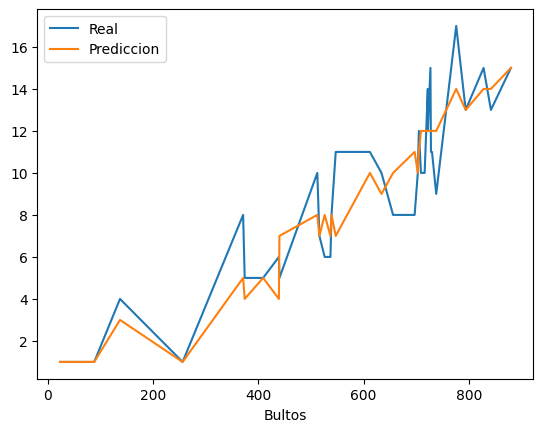

In [95]:
# prediction.shape
df_plot = pd.DataFrame(columns=['Bultos', 'Real', 'Prediccion'])
df_plot['Bultos'] = df_x['Bultos'].values
df_plot['Real'] = df_y['Contenedores'].values
df_plot['Prediccion'] = prediction
df_plot_sorted = df_plot.sort_values(by='Bultos')
df_plot_sorted.plot(x='Bultos', y=['Real', 'Prediccion'])
error = r2_score(df_plot['Real'], df_plot['Prediccion'])


In [96]:
error

0.8307780169573431

In [97]:
df_plot

,Bultos,Real,Prediccion
0,409.0,5,5.0
1,71.0,1,1.0
2,23.0,1,1.0
3,727.0,15,12.0
4,137.0,4,3.0
5,612.0,11,10.0
6,880.0,15,15.0
7,842.0,13,14.0
8,512.0,10,8.0
9,776.0,17,14.0
